In [199]:
import pandas as pd
import numpy as np

In [200]:
data_set = pd.read_csv('../dataset/most_viewed_youtube_shorts.csv')

In [201]:
data_set.head()

,title,published_at,duration,view_count,like_count,comment_count
0,"She Was ""One Minute"" Away From Disaster! #shorts",2023-02-11T16:39:01Z,PT59S,746717484,13068287.0,19863.0
1,I HAVE BANGS… #Shorts,2021-08-30T09:42:50Z,PT23S,555825641,16003237.0,NaN
2,funny vadieo subscribe for more vadieos #shorts,2023-05-25T08:00:01Z,PT28S,482962560,8355647.0,15416.0
3,She turned pregnant and he let her go! #shorts,2022-07-25T11:00:43Z,PT1M,415148935,3954689.0,3807.0
4,Tom&Jerry.. Real End Twist 😆#shorts,2023-06-13T13:40:23Z,PT1M,395791994,6965246.0,NaN


# DATA CLEANING

In [202]:
#Dupilcate Rows  
data_set[data_set['title'].duplicated(keep=False)].count()

title            65
published_at     65
duration         65
view_count       65
like_count       63
comment_count    58
dtype: int64

In [203]:
data_set.drop_duplicates(keep='first')

,title,published_at,duration,view_count,like_count,comment_count
0,"She Was ""One Minute"" Away From Disaster! #shorts",2023-02-11T16:39:01Z,PT59S,746717484,13068287.0,19863.0
1,I HAVE BANGS… #Shorts,2021-08-30T09:42:50Z,PT23S,555825641,16003237.0,NaN
2,funny vadieo subscribe for more vadieos #shorts,2023-05-25T08:00:01Z,PT28S,482962560,8355647.0,15416.0
3,She turned pregnant and he let her go! #shorts,2022-07-25T11:00:43Z,PT1M,415148935,3954689.0,3807.0
4,Tom&Jerry.. Real End Twist 😆#shorts,2023-06-13T13:40:23Z,PT1M,395791994,6965246.0,NaN
...,...,...,...,...,...,...
595,Sweet love story ❤️ #love #shorts #couplegoals...,2023-12-29T13:37:48Z,PT59S,339585,27195.0,73.0
596,Test an Verlobten😂 #funny #shorts,2024-01-05T16:15:35Z,PT1M1S,294921,23560.0,83.0
597,TESTE PARA SABER SE VOCÊ É ALIENÍGENA… 😰🛸👽 #sh...,2023-12-31T15:33:55Z,PT59S,297353,34489.0,731.0
598,Biasanya kebalikan malah🗿#shorts,2024-01-04T08:00:34Z,PT1M1S,289290,19309.0,239.0


In [204]:
# NULL ROWS FOR PARTICULAR COLUMNS
print("views:",data_set['view_count'].isnull().sum()," like_count:",data_set['like_count'].isnull().sum()," comment_count:",data_set['comment_count'].isnull().sum())

views: 0  like_count: 28  comment_count: 28


In [205]:
#Dropping rows having null values
data_set.dropna(inplace=True)

In [206]:
data_set.shape

(544, 6)

# EXPLORATORY DATA ANALYSIS

In [207]:
# Converting Duration into seconds
def convert(str):
    min = 0
    sec = 0
    for i in str:
        if i == 'M':
            min = 60
            sec = 0
        if i.isdigit():
            sec = sec*10 + int(i)
    return sec + min
data_set['duration'] = data_set['duration'].apply(convert)

In [208]:
data_set['title_keywords'] = data_set['title'].apply(lambda x: x.split())
data_set['title_keywords']

0      [She, Was, "One, Minute", Away, From, Disaster...
2      [funny, vadieo, subscribe, for, more, vadieos,...
3      [She, turned, pregnant, and, he, let, her, go!...
5      [Gadgets,, Smart, Appliances,, Kitchen, Utensi...
6      [कामवाली, बाई, और, विराट, कोहली, 🏏😂, IPL, |, K...
                             ...                        
595    [Sweet, love, story, ❤️, #love, #shorts, #coup...
596              [Test, an, Verlobten😂, #funny, #shorts]
597    [TESTE, PARA, SABER, SE, VOCÊ, É, ALIENÍGENA…,...
598                 [Biasanya, kebalikan, malah🗿#shorts]
599    [Tried, Trending, *KOREAN, PANCAKE*🔥Korean, Ve...
Name: title_keywords, Length: 544, dtype: object

In [209]:
data_set['shorts_type'] = ""
def filterer(time):
    if(time>=60):
        return "Long"
    elif(time>=30 and time<60):
        return "intermediate"
    else:
        return "short"
data_set['shorts_type'] = data_set['duration'].apply(filterer)

In [210]:
# Rectifying Publish Data
data_set['published_at'] = pd.to_datetime(data_set['published_at'])
data_set['published_at']

0     2023-02-11 16:39:01+00:00
2     2023-05-25 08:00:01+00:00
3     2022-07-25 11:00:43+00:00
5     2023-01-03 07:52:07+00:00
6     2022-04-10 03:30:05+00:00
                 ...           
595   2023-12-29 13:37:48+00:00
596   2024-01-05 16:15:35+00:00
597   2023-12-31 15:33:55+00:00
598   2024-01-04 08:00:34+00:00
599   2024-01-04 13:00:24+00:00
Name: published_at, Length: 544, dtype: datetime64[ns, UTC]

In [211]:
import nltk

In [212]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [213]:
def tranform(List):
    lst = []
    for i in List:
        if i.isalnum() and (i not in stopwords.words('english')) and (i not in string.punctuation):
            lst.append(i)
    return lst

data_set['title_keywords'] = data_set['title_keywords'].apply(tranform)

In [214]:
data_set['title_keywords']

0                             [She, Was, Away, From]
2                [funny, vadieo, subscribe, vadieos]
3                       [She, turned, pregnant, let]
5                             [Smart, Kitchen, P200]
6                 [और, IPL, Kaamwali, Bai, Part, 16]
                           ...                      
595                             [Sweet, love, story]
596                                           [Test]
597                [TESTE, PARA, SABER, SE, VOCÊ, É]
598                            [Biasanya, kebalikan]
599    [Tried, Trending, Vegetable, Pancake, Recipe]
Name: title_keywords, Length: 544, dtype: object

In [215]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mksinha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2324 (\N{DEVANAGARI LETTER AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mksinha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mksinha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


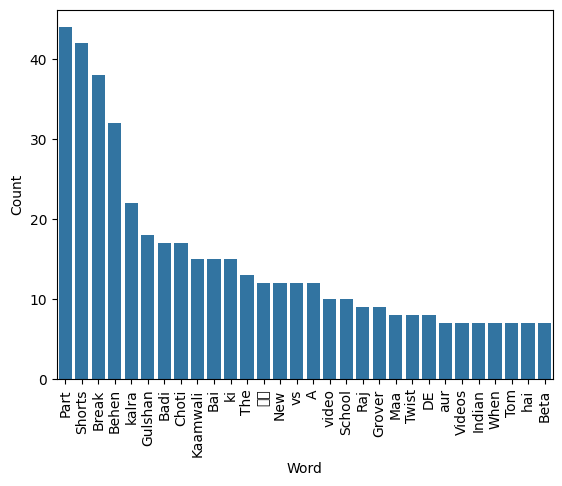

In [216]:
# MOST COMMON WORDS USED IN VIRAL SHORTS
words = []
for i in data_set['title_keywords']:
    for j in i:
        words.append(j)

common_words_df = pd.DataFrame(Counter(words).most_common(30), columns=['Word', 'Count'])
sns.barplot(data=common_words_df,x='Word', y='Count')
plt.xticks(rotation=90) 
plt.show()

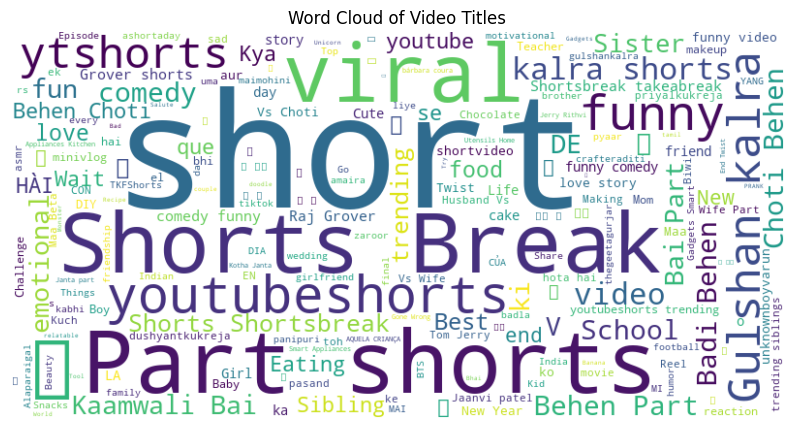

In [217]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_set['title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

<Figure size 1500x1000 with 0 Axes>

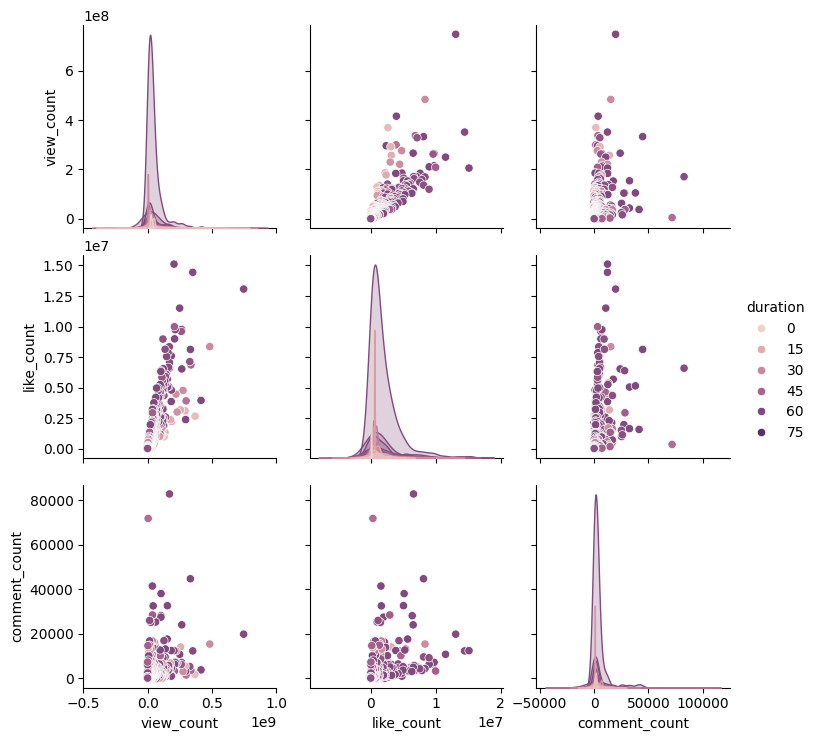

In [218]:
plt.figure(figsize=(15, 10))
sns.pairplot(data_set,hue='duration')
plt.show()

In [219]:
correlation_matrix = data_set.select_dtypes(include='number').corr()
print(correlation_matrix)

               duration  view_count  like_count  comment_count
duration       1.000000   -0.052769    0.150845       0.041098
view_count    -0.052769    1.000000    0.802737       0.300497
like_count     0.150845    0.802737    1.000000       0.339396
comment_count  0.041098    0.300497    0.339396       1.000000


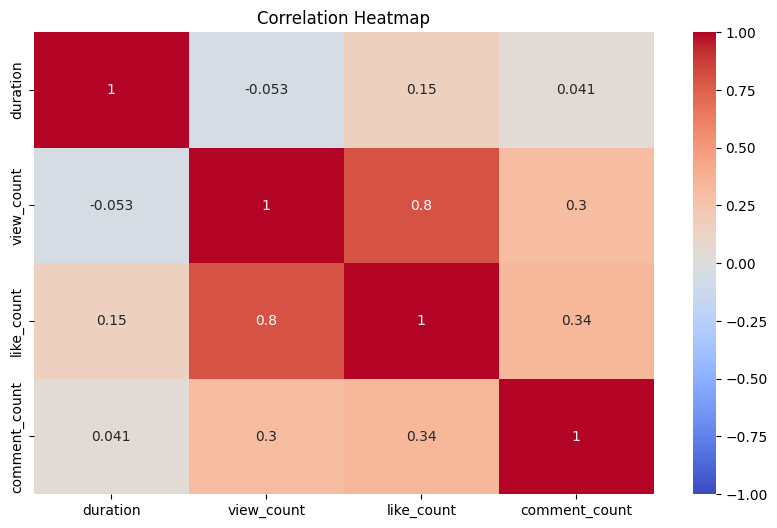

In [220]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Text(0, 0.5, 'frequency')

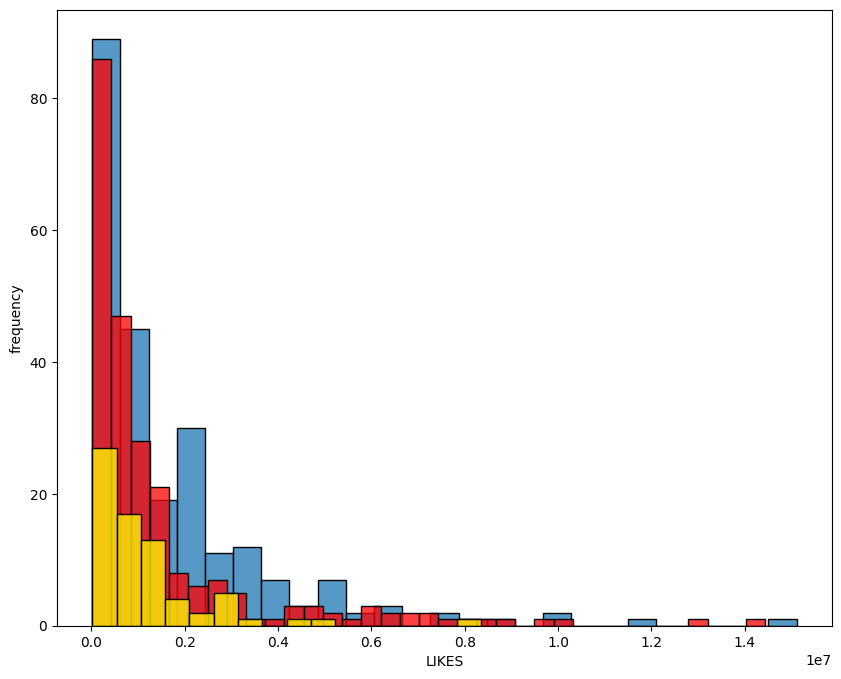

In [221]:
plt.figure(figsize=(10,8))
sns.histplot(data=data_set[data_set['shorts_type'] == "Long"]['like_count'])
sns.histplot(data=data_set[data_set['shorts_type'] == "intermediate"]['like_count'],color='red')
sns.histplot(data=data_set[data_set['shorts_type'] == "short"]['like_count'],color='yellow')
plt.xlabel('LIKES')
plt.ylabel('frequency')

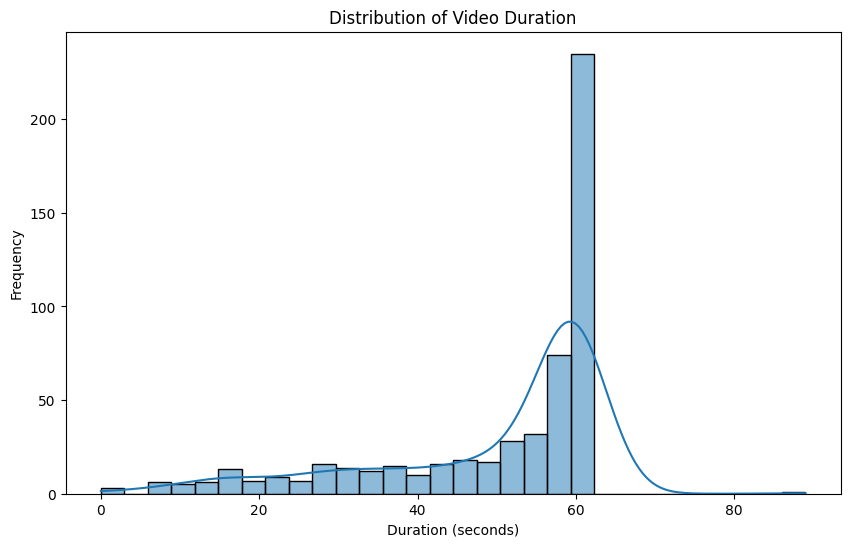

In [222]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data_set['duration'], kde=True, bins=30)
plt.title('Distribution of Video Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

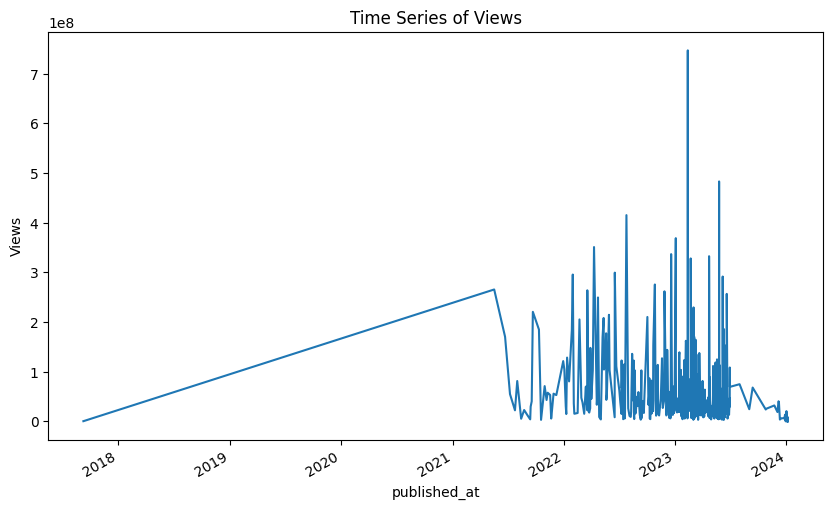

In [223]:
plt.figure(figsize=(10, 6))
data_set.set_index('published_at')['view_count'].plot()
plt.title('Time Series of Views')
plt.xlabel('published_at')
plt.ylabel('Views')
plt.show()

# MODEL TRAINING

Predictiting likes based on views count

In [251]:
data_set['year'] = data_set['published_at'].dt.year
data_set['month'] = data_set['published_at'].dt.month
data_set['day'] = data_set['published_at'].dt.day

In [252]:
x = data_set[['duration', 'year', 'month', 'day', 'comment_count', 'like_count']]
y = data_set['view_count']
# data_set.info()

In [253]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# y_train = y_train.ravel()
# y_test = y_test.ravel()

In [254]:
print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(109, 6) (435, 6) (109,) (435,)


In [255]:
# Model Selection
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [256]:
# pf = PolynomialFeatures(degree=2)
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=100)
sv = SVR(kernel='rbf')
ml = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=1000)
kn = KNeighborsRegressor(n_neighbors=5)

In [257]:
# x_train = x_train.values.reshape(-1,1)
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
gb.fit(x_train,y_train)
sv.fit(x_train,y_train)
ml.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [258]:
y_predict = [lr.predict(x_test),dt.predict(x_test),rf.predict(x_test),gb.predict(x_test),sv.predict(x_test),ml.predict(x_test),kn.predict(x_test)]

In [263]:
# RMSE
cnt = 1
for i in y_predict:
    r2 = mean_squared_error(y_test,i)
    print(cnt,end=")")
    print(r2**0.5,end = " ")
    cnt+=1

1)66403983.97622982 2)64913669.94547036 3)59515588.084544726 4)57713192.57423613 5)109105038.73882236 6)68070777.98370644 7)71255042.08614942 

In [264]:
cnt = 1
for i in y_predict:
    r2 = r2_score(y_test,i)
    print(cnt,end=")")
    print(r2,end = " ")
    cnt+=1

1)0.5740615386593011 2)0.59296579035117 3)0.6578472427567422 4)0.6782572392534646 5)-0.14986856436024643 6)0.5524103721445457 7)0.5095555917057281 

Model: GradientBoostingRegressor is the best fitted 